In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

In [7]:
df = pd.read_csv('C:/Users/vmahin01/Downloads/Market_Risk_Data_coded (1).csv')

In [8]:
df.head().T

,0,1,2,3,4
Date,28-03-2016,04-04-2016,11-04-2016,18-04-2016,25-04-2016
ITC Limited,217,218,215,223,214
Bharti Airtel,316,302,308,320,319
Tata Motors,386,386,374,408,418
DLF Limited,114,121,120,122,122
Yes Bank,173,171,171,172,175


In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.head()

,Date,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [11]:
df.shape

(418, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC_Limited    418 non-null    int64 
 2   Bharti_Airtel  418 non-null    int64 
 3   Tata_Motors    418 non-null    int64 
 4   DLF_Limited    418 non-null    int64 
 5   Yes_Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


In [13]:
df.describe()

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,278.964115,528.260766,368.617225,276.827751,124.442584
std,75.114405,226.507879,182.024419,156.280781,130.090884
min,156.000000,261.000000,65.000000,110.000000,11.000000
25%,224.250000,334.000000,186.000000,166.250000,16.000000
50%,265.500000,478.000000,399.500000,213.000000,30.000000
75%,304.000000,706.750000,466.000000,360.500000,249.750000
max,493.000000,1236.000000,1035.000000,928.000000,397.000000


Creating plots for above mentioned stocks

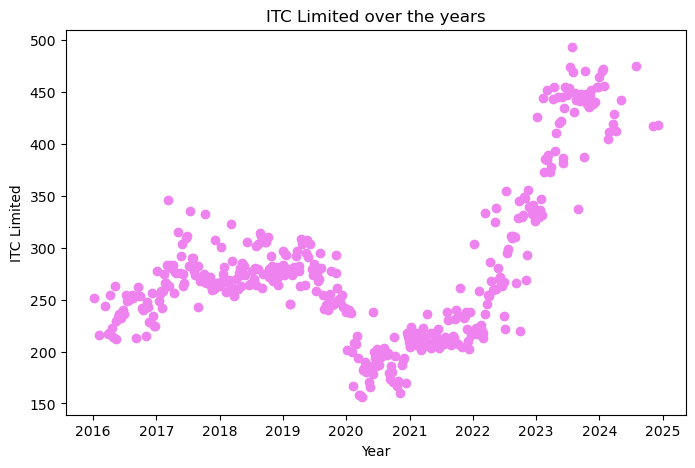

In [25]:
plt.figure(figsize=(8,5))
df['Date'] = [pd.to_datetime(d) for d in df['Date']]
plt.scatter(df['Date'], df['ITC_Limited'], color = 'violet')
plt.xlabel('Year')
plt.ylabel('ITC Limited')
plt.title('ITC Limited over the years')
plt.show();

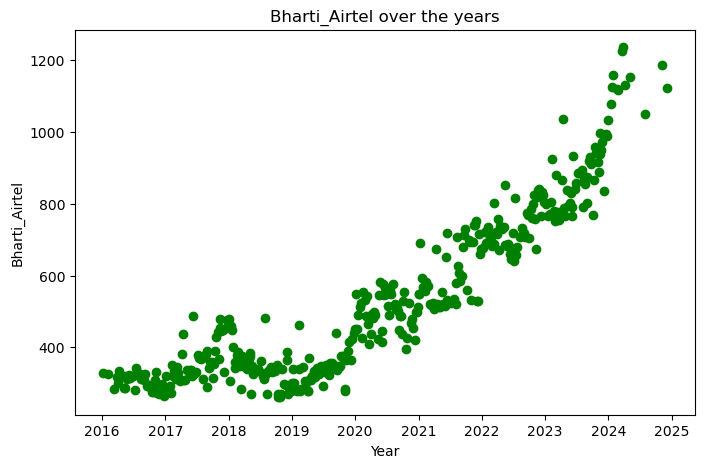

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df['Date'], df['Bharti_Airtel'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Bharti_Airtel')
plt.title('Bharti_Airtel over the years')
plt.show();

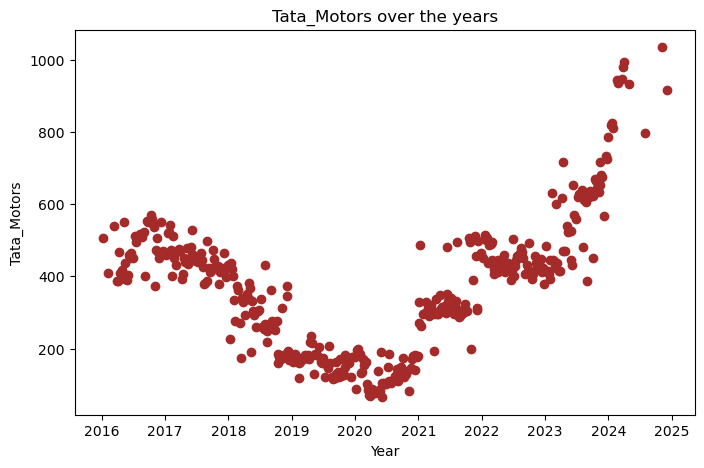

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(df['Date'], df['Tata_Motors'], color = 'brown')
plt.xlabel('Year')
plt.ylabel('Tata_Motors')
plt.title('Tata_Motors over the years')
plt.show();

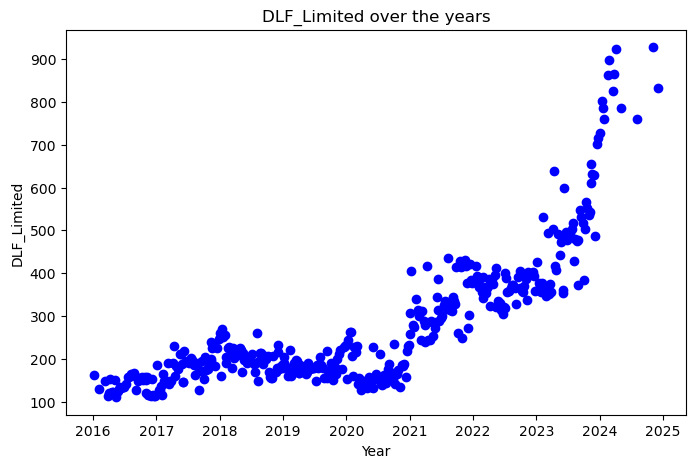

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(df['Date'], df['DLF_Limited'], color = 'blue')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show();

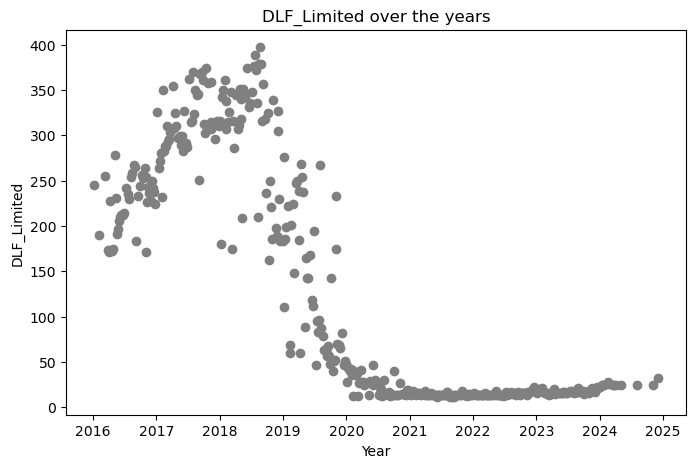

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(df['Date'], df['Yes_Bank'], color = 'grey')
plt.xlabel('Year')
plt.ylabel('DLF_Limited')
plt.title('DLF_Limited over the years')
plt.show();

Analyzing Returns

In [33]:
df1 = df.drop('Date', axis=1)

In [34]:
df1

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,217,316,386,114,173
1,218,302,386,121,171
2,215,308,374,120,171
3,223,320,408,122,172
4,214,319,418,122,175
...,...,...,...,...,...
413,411,1118,937,898,26
414,412,1132,993,925,25
415,417,1186,1035,928,24
416,419,1225,946,826,24


In [36]:
returns = np.log(df1).diff(axis = 0, periods = 1)

In [37]:
returns

,ITC_Limited,Bharti_Airtel,Tata_Motors,DLF_Limited,Yes_Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291
...,...,...,...,...,...
413,0.014706,-0.002680,-0.006383,0.038597,-0.074108
414,0.002430,0.012445,0.058047,0.029624,-0.039221
415,0.012063,0.046600,0.041426,0.003238,-0.040822
416,0.004785,0.032355,-0.089914,-0.116437,0.000000


In [38]:
returns.shape

(418, 5)

Stock Return Mean

In [39]:
stock_means = returns.mean(axis=0)
stock_means

ITC_Limited      0.001634
Bharti_Airtel    0.003271
Tata_Motors      0.002234
DLF_Limited      0.004863
Yes_Bank        -0.004737
dtype: float64

Volatility / Stock Standard Deviation

In [40]:
stock_vol = returns.std(axis=0)
stock_vol

ITC_Limited      0.035904
Bharti_Airtel    0.038728
Tata_Motors      0.060484
DLF_Limited      0.057785
Yes_Bank         0.093879
dtype: float64

In [44]:
analysed = pd.DataFrame({'Stock': ['ITC_Limited','Bharti_Airtel','Tata_Motors','DLF_Limited','Yes_Bank'],
                         'Average':stock_means , 'Volatility':stock_vol })
analysed

,Stock,Average,Volatility
ITC_Limited,ITC_Limited,0.001634,0.035904
Bharti_Airtel,Bharti_Airtel,0.003271,0.038728
Tata_Motors,Tata_Motors,0.002234,0.060484
DLF_Limited,DLF_Limited,0.004863,0.057785
Yes_Bank,Yes_Bank,-0.004737,0.093879


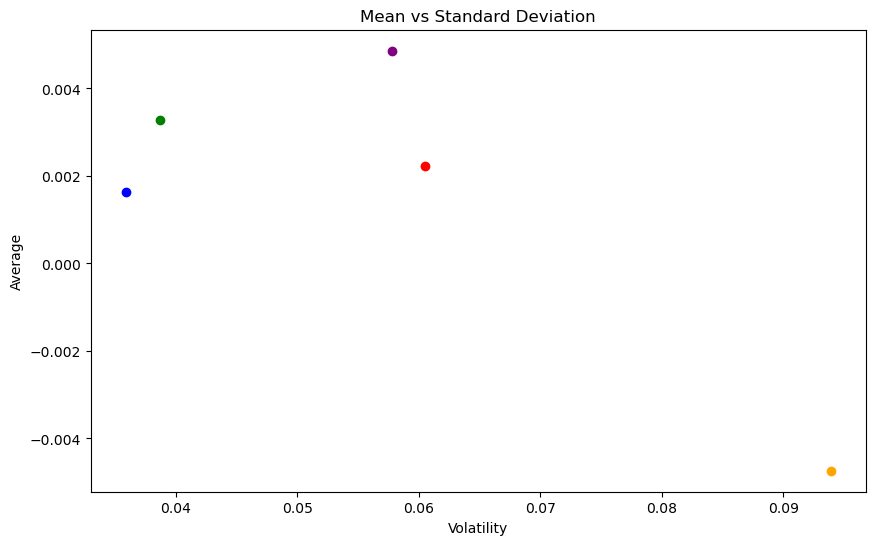

In [47]:
colors = {
    'ITC_Limited': 'blue',
    'Bharti_Airtel': 'green',
    'Tata_Motors': 'red',
    'DLF_Limited': 'purple',
    'Yes_Bank': 'orange'}
    
plt.figure(figsize=(10, 6))

for stock in analysed['Stock']:
    plt.scatter(
        analysed[analysed['Stock'] == stock]['Volatility'],
        analysed[analysed['Stock'] == stock]['Average'],
        color=colors[stock],
        label=stock
    )
    
plt.xlabel('Volatility')
plt.ylabel('Average')
plt.title('Mean vs Standard Deviation')
plt.show();   